# Medical Insurance Cost Prediction

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings

# Ignore UserWarnings
warnings.filterwarnings("ignore")

### Data Collection and Analysis

In [2]:
# load the insurance dataset as pandas dataframe
insurance_dataset = pd.read_csv('./insurance.csv')

In [3]:
# print the first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# check the number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# get some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Categorical Features
- Sex
- Smoker
- Region

In [6]:
# check the missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [7]:
# check the statistical metrics
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


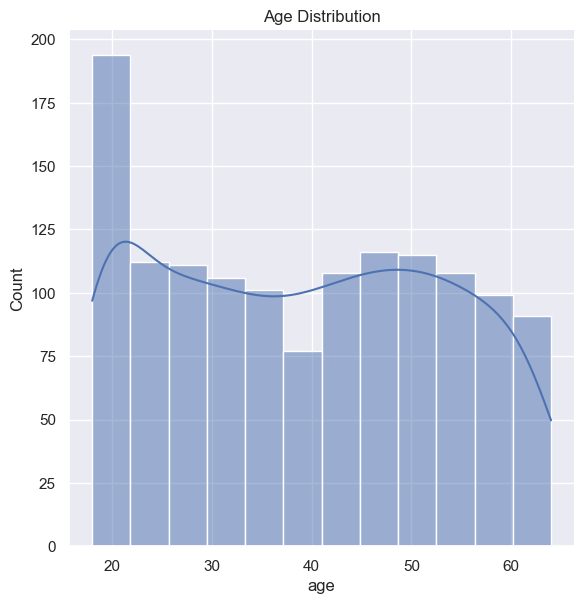

In [8]:
# distribution of age value
sns.set_theme()
sns.displot(insurance_dataset['age'], kde=True, height=6, aspect=1)
plt.title('Age Distribution')
plt.show()

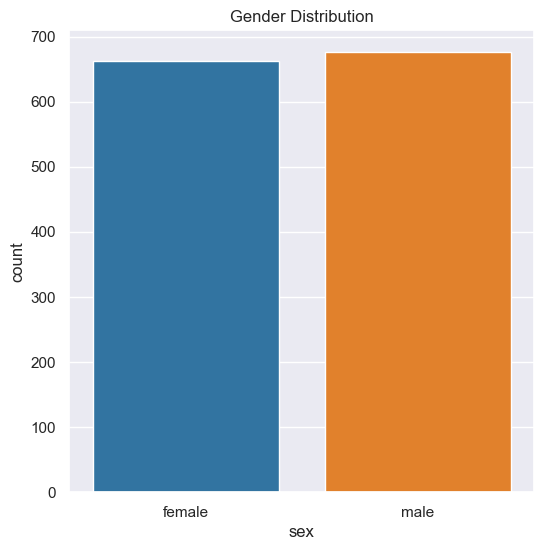

In [9]:
# Gender column
sns.set_theme()
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset, hue='sex', palette=['tab:blue', 'tab:orange'], legend=False)
plt.title('Gender Distribution')
plt.show()

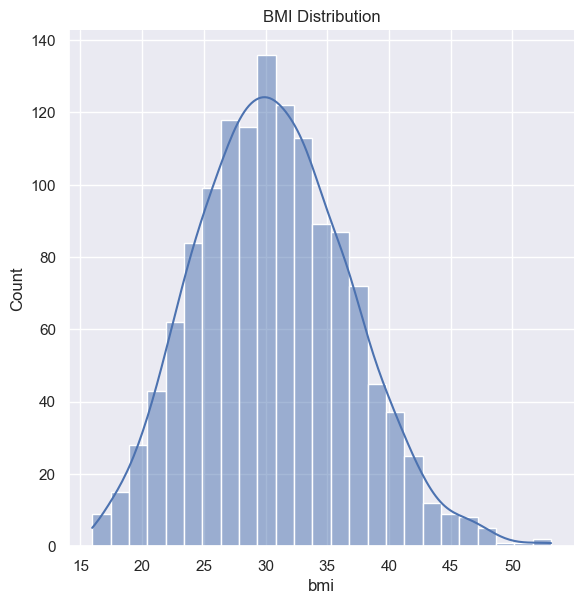

In [10]:
# bmi distribution
sns.set_theme()
sns.displot(insurance_dataset['bmi'], kde=True, height=6, aspect=1)
plt.title('BMI Distribution')
plt.show()

In [11]:
### Normal BMI Range --> 18.5 to 24.9

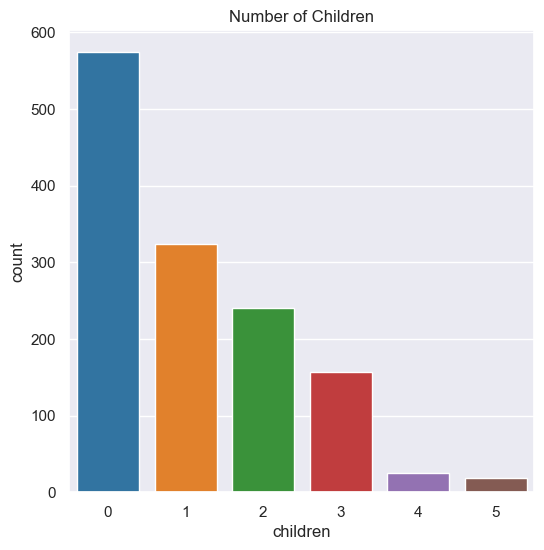

In [12]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset, hue='children', palette=['tab:blue', 'tab:orange','tab:green', 'tab:red','tab:purple', 'tab:brown'], legend=False)
plt.title('Number of Children')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

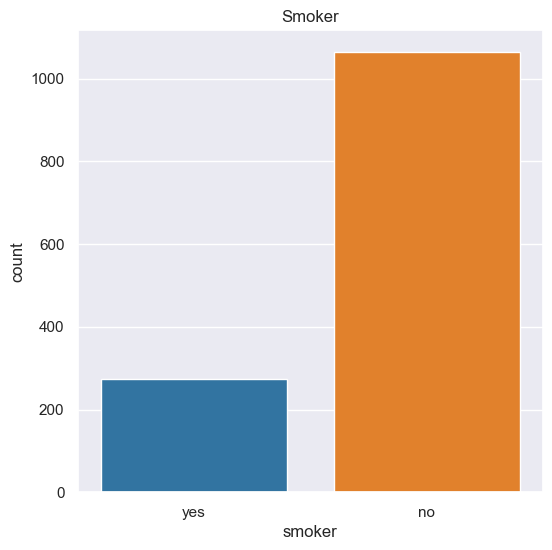

In [14]:
# smoker column
sns.set_theme()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset, hue='smoker', palette=['tab:blue', 'tab:orange'], legend=False)
plt.title('Smoker')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

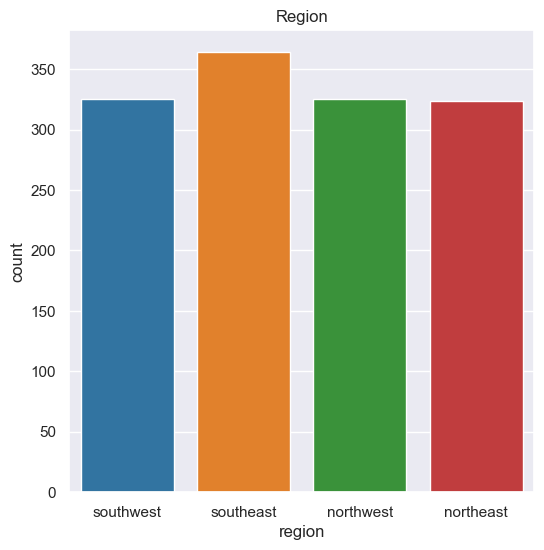

In [16]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset, hue='region', palette=['tab:blue', 'tab:orange','tab:green', 'tab:red'], legend=False)
plt.title('Region')
plt.show()

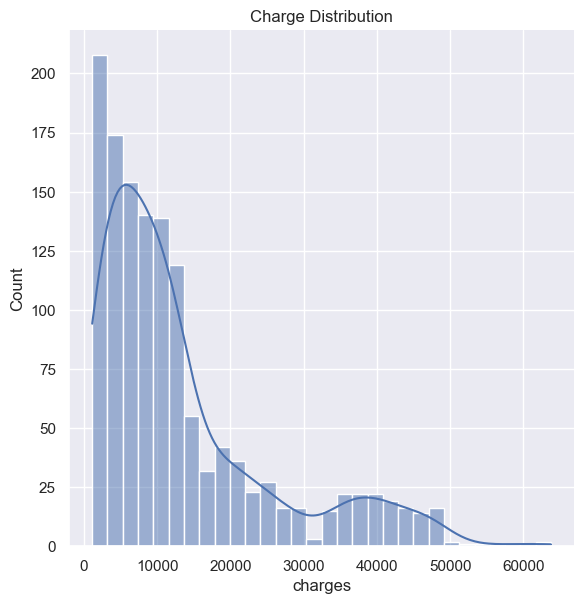

In [17]:
# distribution of charges
sns.set_theme()
sns.displot(insurance_dataset['charges'], kde=True, height=6, aspect=1)
plt.title('Charge Distribution')
plt.show()

### Data Pre-processing
- Encode the categorical features

In [18]:
# encode the sex, smoker and region columns
insurance_dataset.replace({'sex':{'male':0, 'female':1}, 'smoker':{'yes':0, 'no':1}, 
                           'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [19]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


### Splitting the Features and Target

In [20]:
X = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [21]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [22]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Training and Test Data Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training
- Linear Regression

In [25]:
# load the linear regression model
regressor = LinearRegression()

In [26]:
regressor.fit(X_train, y_train)

LinearRegression()

- Model Evaluation

In [27]:
# training data prediction
training_data_prediction = regressor.predict(X_train)

In [28]:
# R-squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R2 value for training data : ', r2_train)

R2 value for training data :  0.751505643411174


In [29]:
# test data prediction
test_data_prediction = regressor.predict(X_test)

In [30]:
# R-squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R2 value for test data : ', r2_test)

R2 value for test data :  0.7447273869684077


### Build a Predictive System

In [31]:
input_data = (31, 1, 25.74, 0, 1, 0)

# change input data into numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)

print(prediction[0])

3760.0805764960496
